## PROYECTO MÓDULO 3: Optimización de Talento

#### A partir de un CSV con datos de trabajadores debemos tratar los datos siguiendo los siguientes pasos:

1. Averiguar por qué se han marchado las empleadas de la empresa.
2. Si queremos más información o pistas podemos preguntarle a Rocío
3. FASES: 
    1. Hacer un EDA
    2. Transformar los datos (limpieza de nulos, normalización, etc.)
    3. Visualización de datos (hacer gráficas en Python). 
    4. BONUS: Diseño de base de datos e insertar los datos en SQL. 
    5. BONUS: Creación de ETL, hacer funciones para automatizar el proceso. 
    6. Hacer una presentación:
        - **Introducción, objetivos, pasos y organización**
        - Parte central: **análisis de los gráficas, tablas...**
        - **¿Qué info podemos obtener de estos? ¿Consejos para la empresa? ¿Mejoras? ¿Encontramos correlación entre variables?**
        - **Retos y soluciones**
        - **Conclusiones**
4. Aplicar metodología Agile y Srum. **Rocío** va a ser la clienta final: **Product Owner**


### PARTE 4: VISUALIZACIÓN

In [1]:
#Importar librería
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Configuración de la visualización del DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Lectura del CSV y transformación a DataFrame (df)
df=pd.read_csv("HR_RAW_v2.csv", index_col =0)
df.sample(5)

,numero_empleado,desvinculado,genero,edad,año_nacimiento,estado_civil,nivel_estudios,campo_estudios,frecuencia_viaje,distancia_domicilio,teletrabajo,tipo_jornada,formaciones_ultimo_año,trabajos_anteriores,años_en_activo,antigüedad_empresa,años_ultimo_ascenso,años_mismo_responsable,departamento,categoria,puesto,horas_extras,evaluacion_desempeño,tarifa_hora,tarifa_diaria,tarifa_mensual,ingreso_mensual,%_incremento_salarial,acceso_acciones_empresa,nivel_compromiso,nivel_satisfaccion_global,nivel_satisfaccion_trabajo,nivel_ satisfaccion_relaciones,nivel_satisfaccion_conciliacion
322,0.0,No,female,30,1993,single,3,ns/nc,non travel,3.22,no,part time,2,0,12.0,11,6,7,sin asignar,1,laboratory technician,No,3.0,49.0,1116.0,7181,4859.0,14,0,3,3,4,3,2.0
132,780.0,Yes,male,33,1990,single,4,Other,travel rarely,1.61,no,part time,2,1,10.0,10,7,8,sin asignar,1,research scientist,No,3.0,63.0,527.0,5207,4859.0,13,0,3,4,4,3,2.0
1113,1735.0,No,female,23,2000,single,1,ns/nc,non travel,6.44,no,full time,3,1,3.0,3,1,2,sin asignar,1,laboratory technician,No,3.0,51.0,160.0,12862,4859.0,13,0,3,3,2,3,1.0
1303,615.0,No,male,40,1983,ns/nc,3,Other,non travel,45.06,yes,full time,2,3,20.0,1,0,1,sin asignar,3,sales executive,No,3.0,58.0,1094.0,11373,4859.0,15,1,1,3,1,3,3.0
541,804.0,No,female,34,1989,ns/nc,4,ns/nc,non travel,3.22,yes,part time,3,1,6.0,6,1,3,research & development,1,research scientist,No,3.0,86.0,121.0,7530,4381.0,11,0,2,3,1,3,3.0


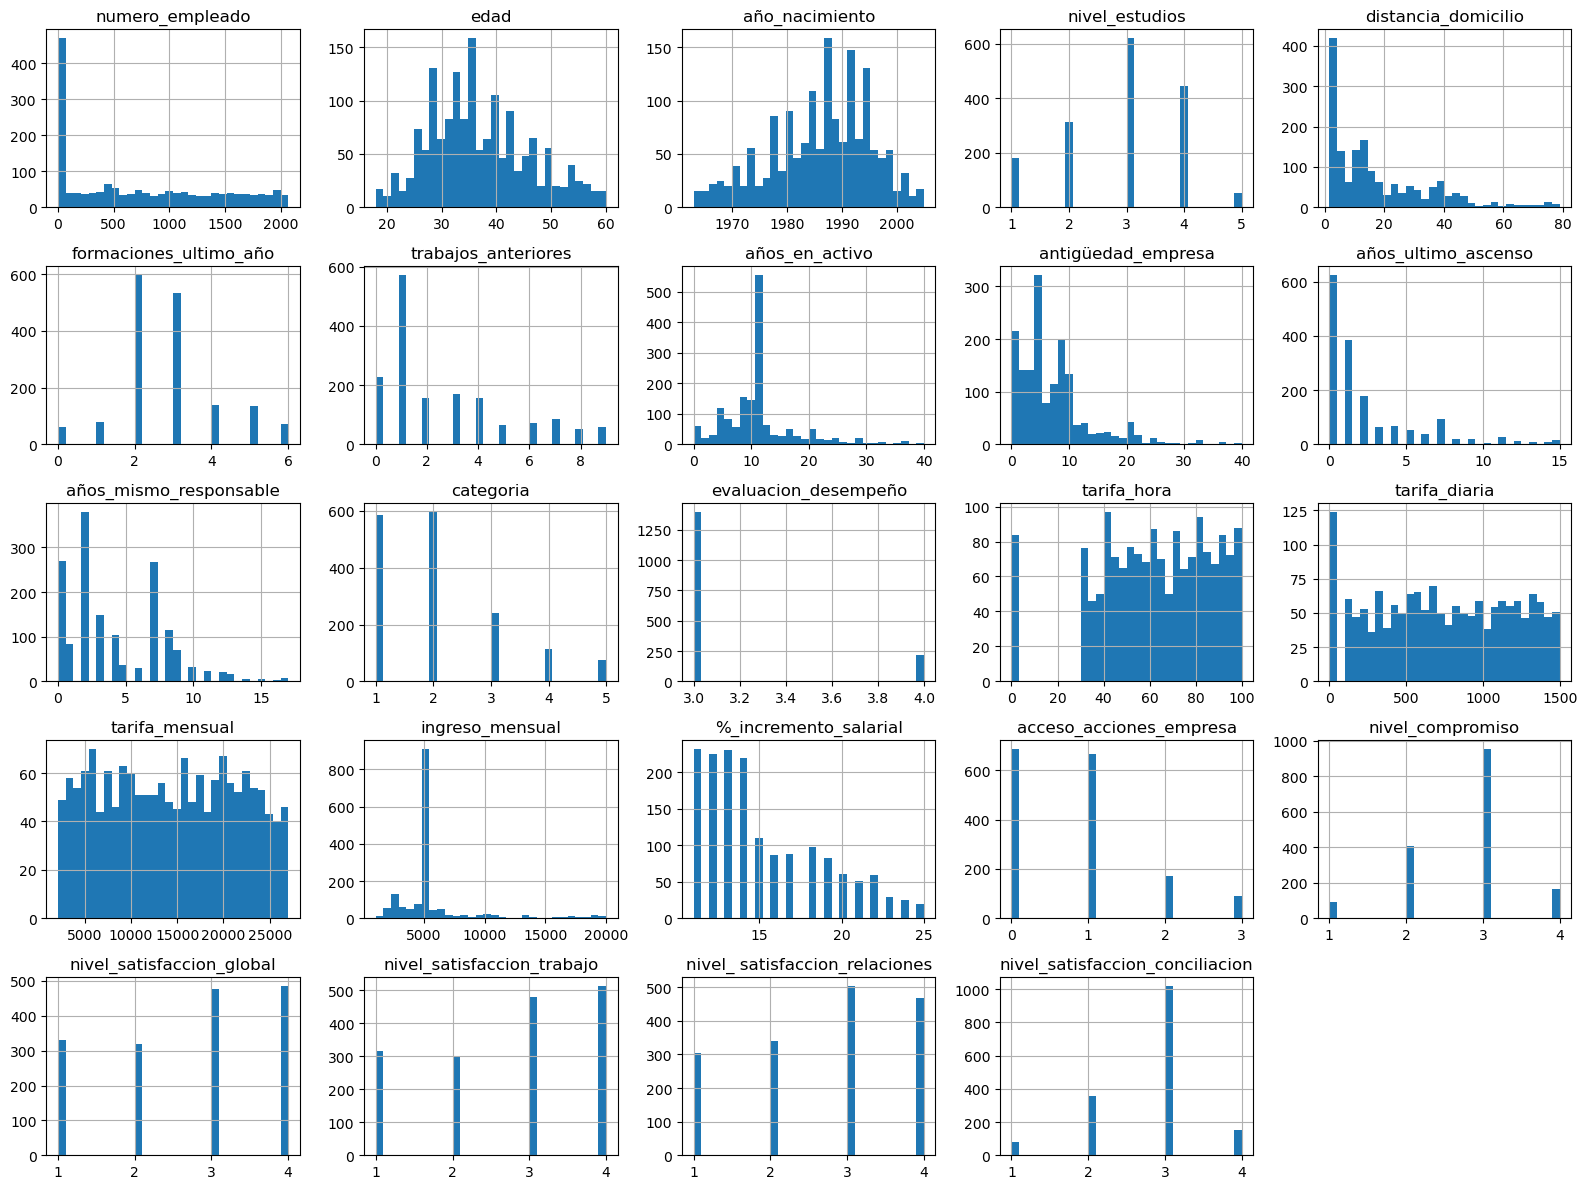

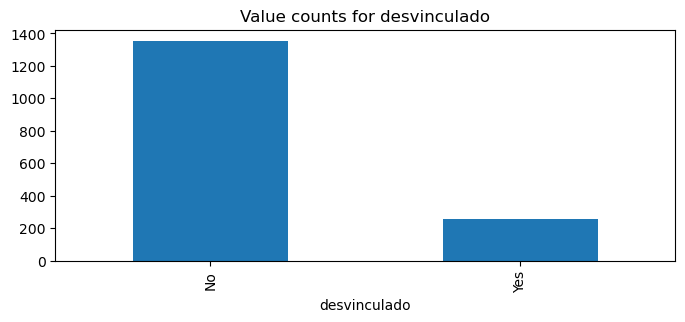

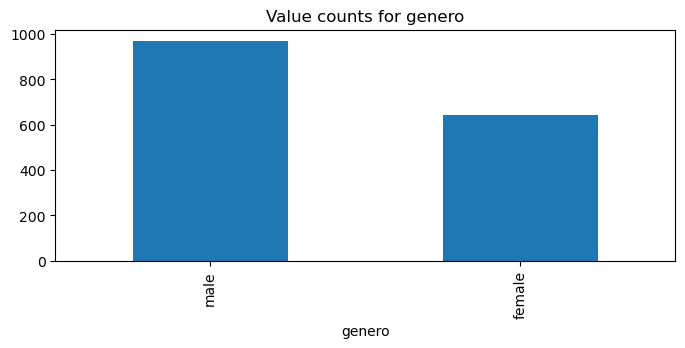

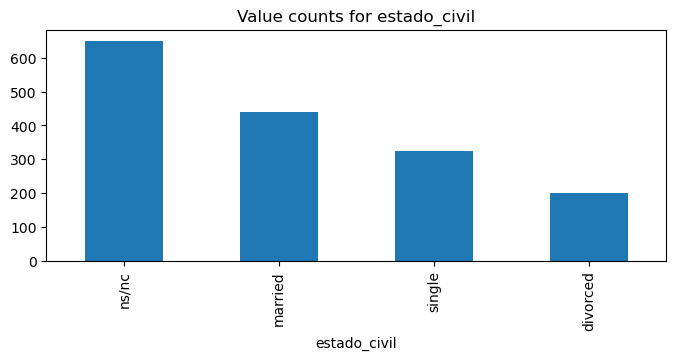

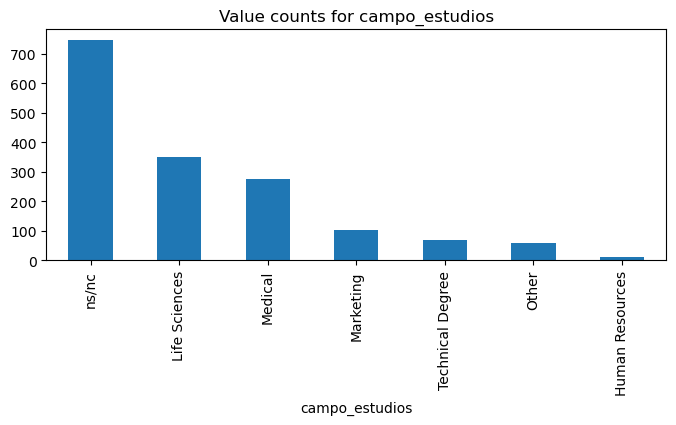

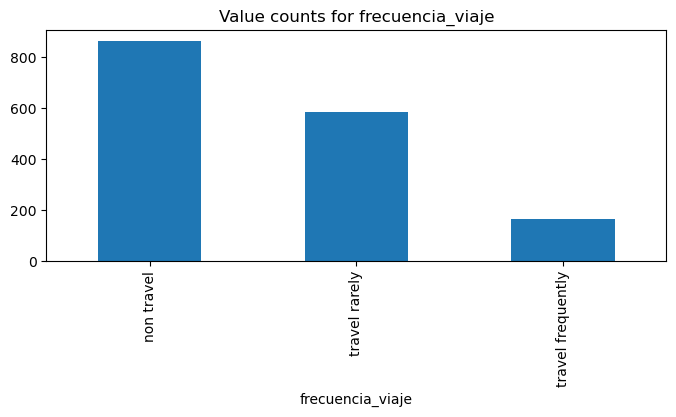

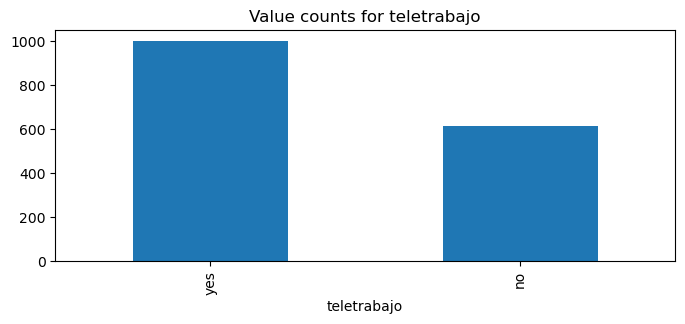

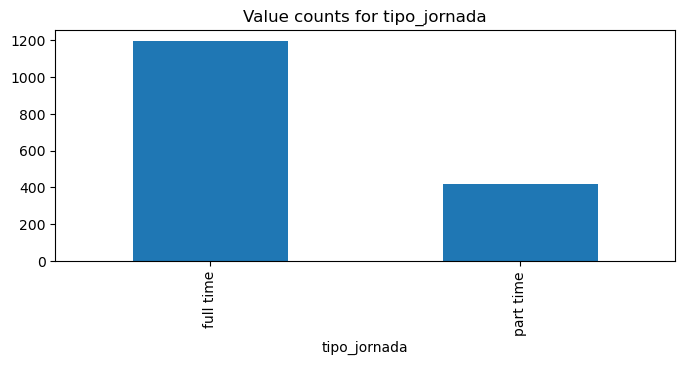

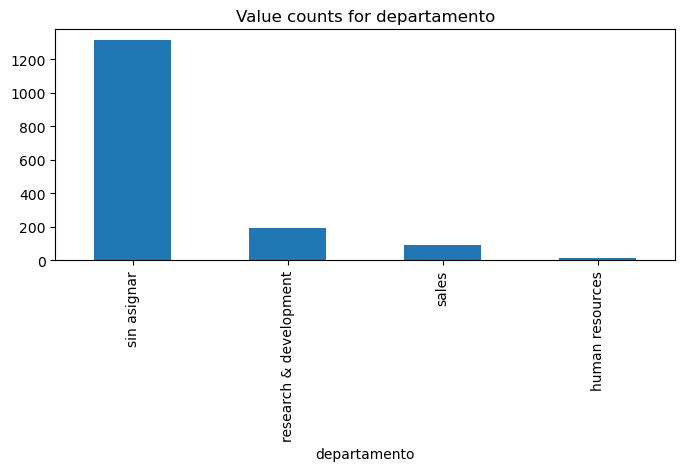

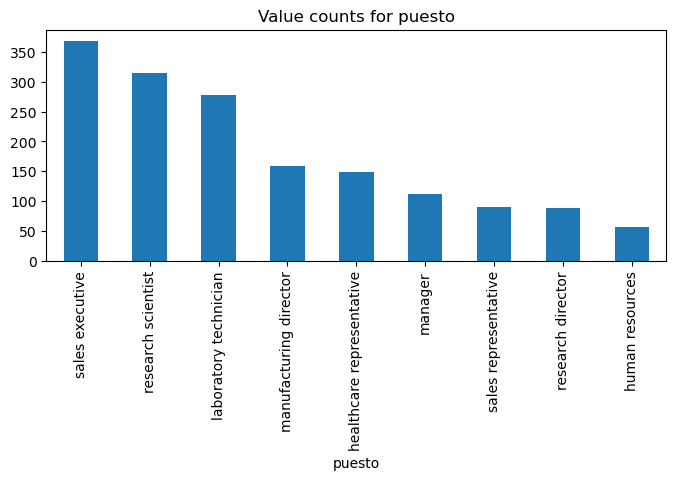

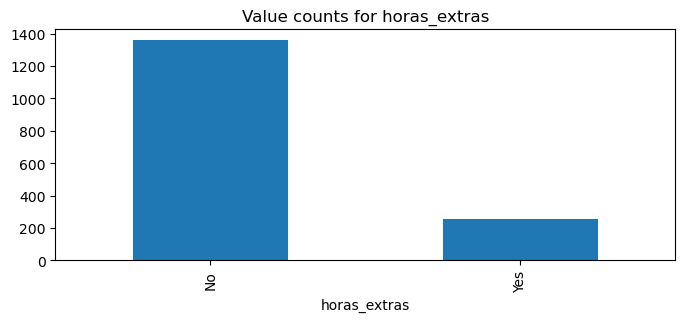

In [ ]:
# Histograms for numeric columns
df.select_dtypes(include=[np.number]).hist(figsize=(16,12), bins=30)
plt.tight_layout()
plt.show()


# Bar plots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8,3))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Value counts for {col}')
    plt.show()

    

🧠 1. ¿Se están yendo los empleados menos satisfechos?

Dejamos la consulta, ya que puede ser interesante analizar si las personas que se han ido son trabajadores que a la empresa le interesaba tener o no. 

* Consulta: ¿Se van quienes tienen alta evaluación, compromiso o satisfacción?
* Variables: desvinculado, nivel_compromiso, nivel_satisfaccion_global,nivel satisfaccion trabajo.
* ✅ Gráfico: Boxplot: Comparar niveles de desempeño/satisfacción entre empleados activos vs. desvinculados.
    
    



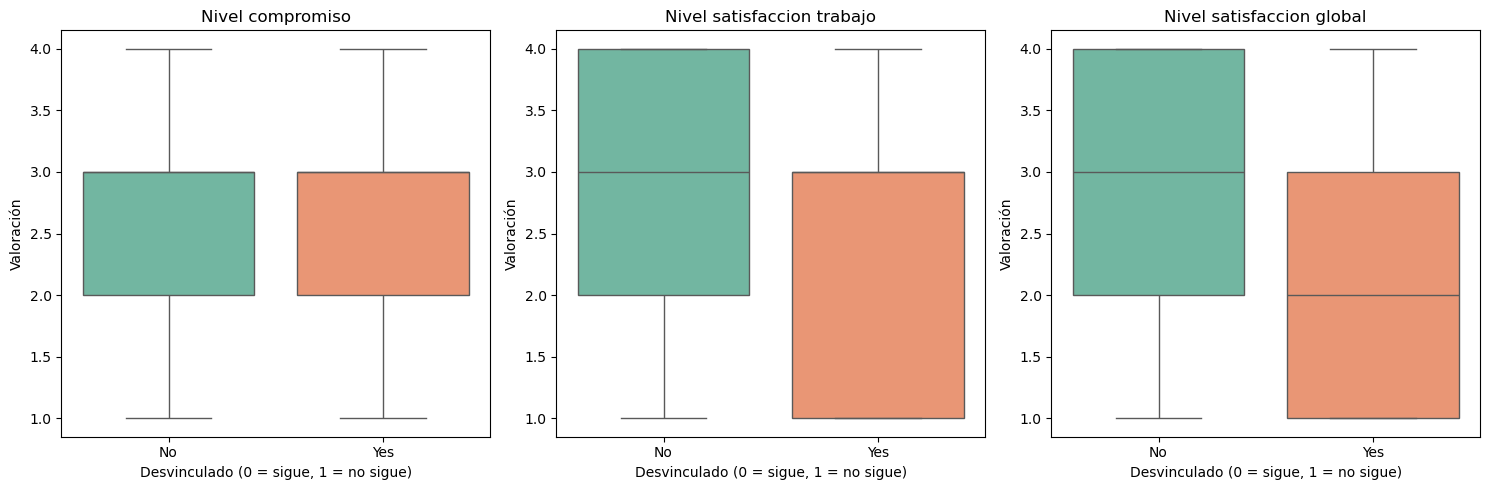

In [31]:
cols_valoracion = ['nivel_compromiso', 'nivel_satisfaccion_trabajo', 'nivel_satisfaccion_global']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_valoracion):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='desvinculado', y=col, hue='desvinculado', data=df, palette='Set2', legend=False)
    plt.title(f'{col.replace("_", " ").capitalize()}')
    plt.xlabel('Desvinculado (0 = sigue, 1 = no sigue)')
    plt.ylabel('Valoración')
plt.tight_layout()
plt.show()

💸 2. ¿Existe una brecha entre desempeño y compensación?

* Consulta: ¿Cobran menos quienes rinden más? ¿Se van?
* Variables: evaluacion_desempeño, ingreso_mensual, desvinculado
* ✅ Gráfico sugerido:
    * Scatterplot: evaluacion_desempeño vs. ingreso_mensual, coloreado por desvinculado.
    * Heatmap de correlaciones entre variables salariales y de desempeño.



In [37]:
df[['desvinculado','evaluacion_desempeño','ingreso_mensual']]

,desvinculado,evaluacion_desempeño,ingreso_mensual
0,No,3.0,19537.0
1,No,3.0,19999.0
2,No,3.0,19232.0
3,No,3.0,17169.0
4,No,3.0,4859.0
5,No,3.0,17174.0
6,No,3.0,4859.0
7,No,4.0,4859.0
8,No,3.0,16595.0
9,No,3.0,4859.0


In [41]:
df_ingreso= df.groupby('desvinculado')['ingreso_mensual'].mean().round(2)
df_ingreso

desvinculado
No     5788.42
Yes    4815.15
Name: ingreso_mensual, dtype: float64

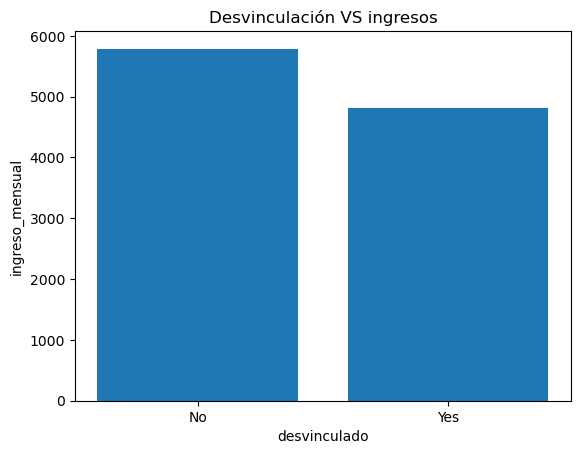

In [45]:
plt.bar(x=df_ingreso.index, height=df_ingreso.values)
plt.xlabel('desvinculado')
plt.ylabel('ingreso_mensual')
plt.title('Desvinculación VS ingresos')
plt.show()

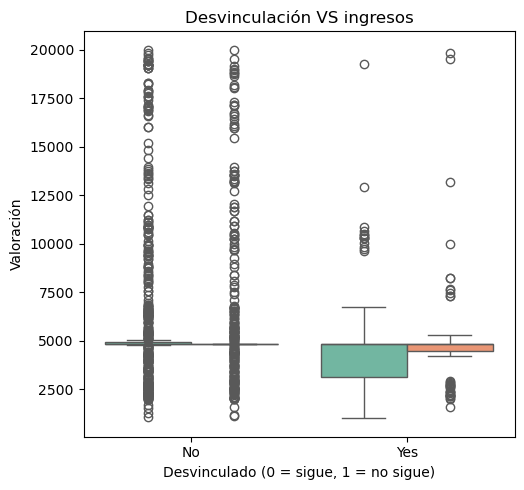

In [54]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, i + 1)
sns.boxplot(x='desvinculado', y='ingreso_mensual', hue='genero', data=df, palette='Set2', legend=False)
plt.title('Desvinculación VS ingresos')
plt.xlabel('Desvinculado (0 = sigue, 1 = no sigue)')
plt.ylabel('Valoración')
plt.tight_layout()
plt.show()

🧭 3. ¿La movilidad interna reduce la desvinculación?

* Consulta: ¿Se quedan más quienes han sido promovidos o cambiaron de jefe?
* Variables: años_ultimo_ascenso, años_mismo_responsable, desvinculado
* ✅ Gráfico: gráfico de barras.


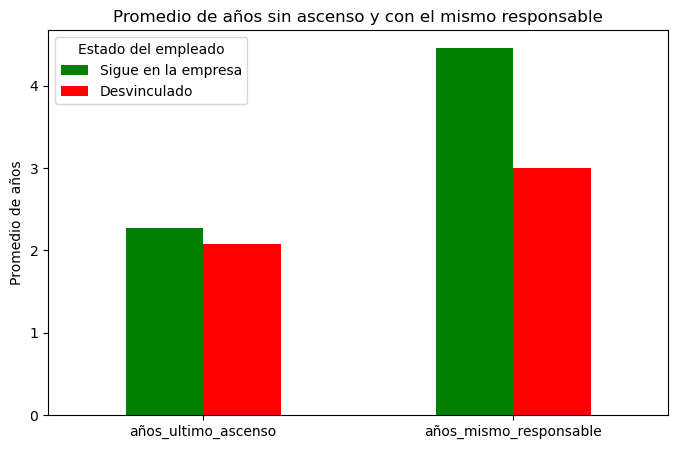

In [38]:
df_grouped = df.groupby('desvinculado')[['años_ultimo_ascenso', 'años_mismo_responsable']].mean().T
# Renombrar columnas para claridad
df_grouped.columns = ['Sigue en la empresa', 'Desvinculado']
# Gráfico de barras
df_grouped.plot(kind='bar', figsize=(8, 5), color=['green', 'red'])
plt.title('Promedio de años sin ascenso y con el mismo responsable')
plt.ylabel('Promedio de años')
plt.xticks(rotation=0)
plt.legend(title='Estado del empleado')
plt.show()